Dataset\
banknotes.csv

Load the dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('banknotes.csv')

In [4]:
df.shape

(1372, 5)

In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

Separate the input and output varibles

In [14]:
# input data
x = df.drop('Class', axis=1)

# output data
y = df['Class']

Explore the data

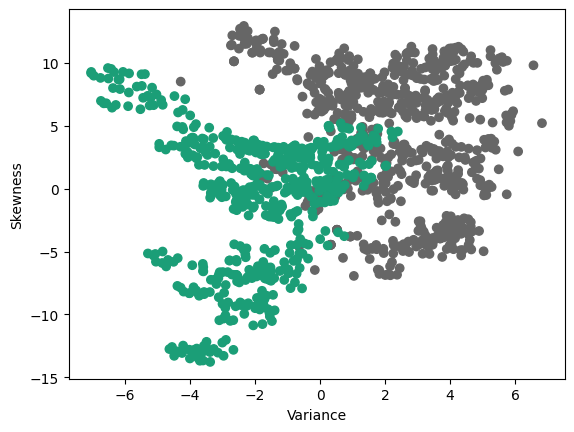

In [28]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(df['Variance'], df['Skewness'],c =y, cmap='Dark2_r')

<Axes: xlabel='Variance', ylabel='Skewness'>

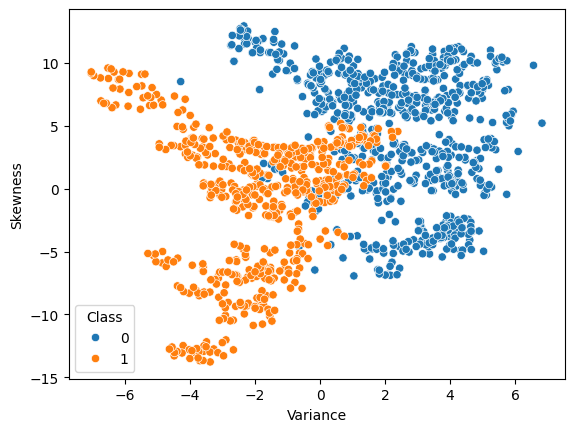

In [18]:
sns.scatterplot(x=df['Variance'],y= df['Skewness'],hue=df['Class'])

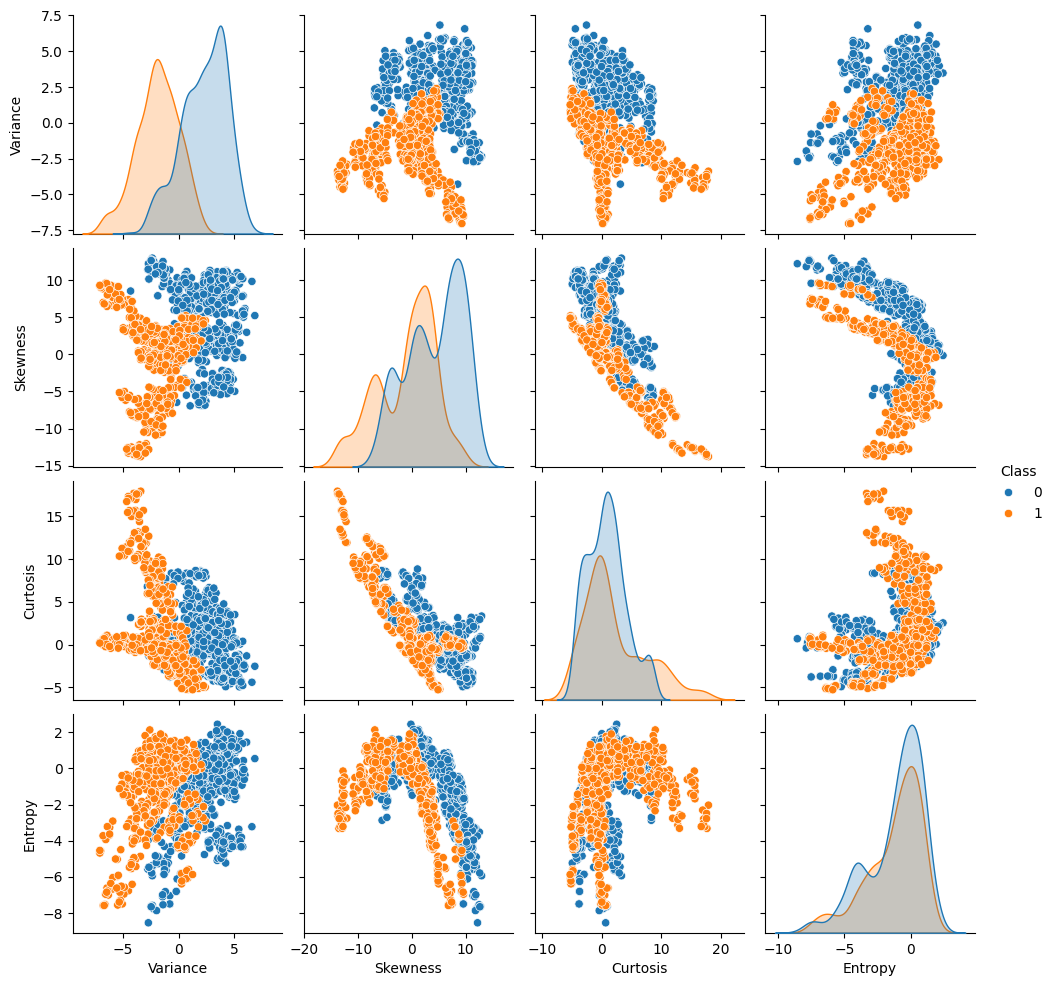

In [30]:
sns.pairplot(df, hue='Class')

([<matplotlib.patches.Wedge at 0x1f2977f0c40>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

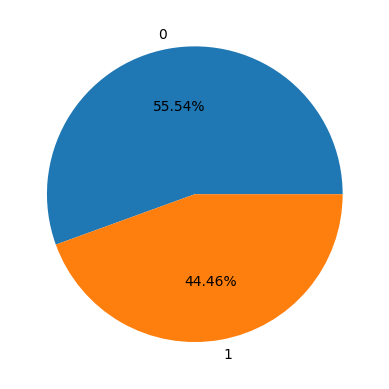

In [34]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%')

Cross Validation

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [38]:
X_train.shape

(1029, 4)

In [39]:
X_test.shape

(343, 4)

Build the Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(random_state=0)

In [42]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Performace Evaluation

In [43]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [44]:
y_pred = dt.predict(X_test)

In [45]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [46]:
accuracy_score(y_test, y_pred)

0.9795918367346939

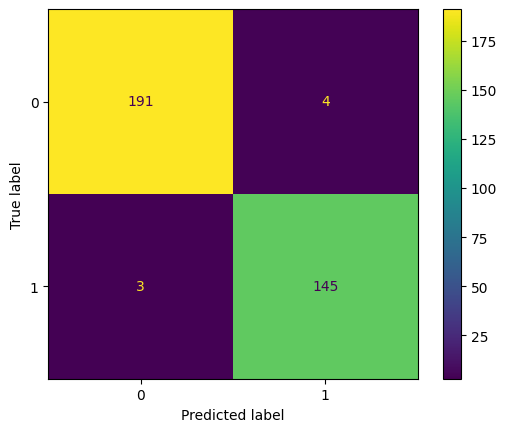

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [49]:
accuracy_score(y_test, y_pred)

0.9795918367346939

Feature Importance

<BarContainer object of 4 artists>

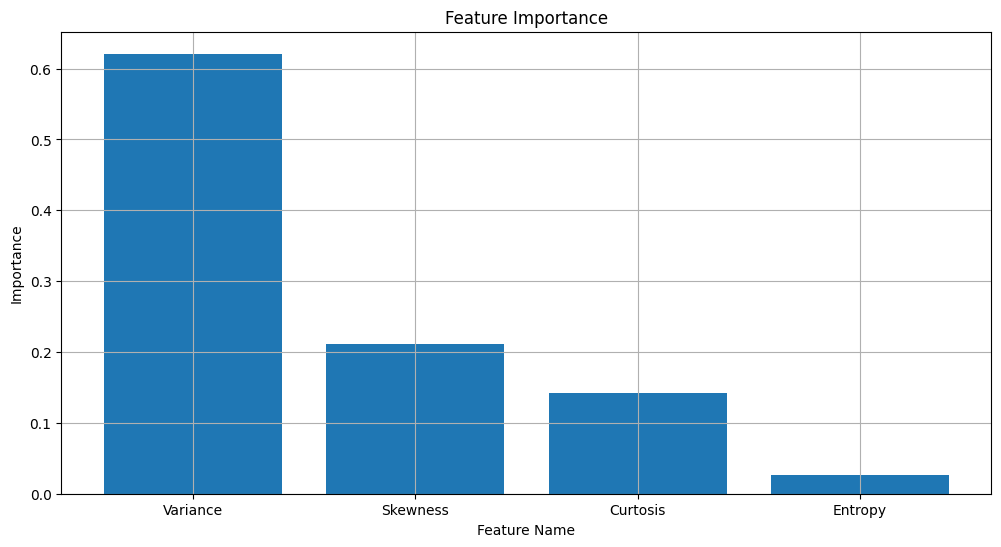

In [52]:
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dt.feature_importances_)

Visualize the tree

In [54]:
from sklearn.tree import plot_tree

[Text(0.4991319444444444, 0.9444444444444444, 'Variance <= 0.27\ngini = 0.49\nsamples = 1029\nvalue = [567, 462]\nclass = G'),
 Text(0.3298611111111111, 0.8333333333333334, 'Skewness <= 7.57\ngini = 0.3\nsamples = 495\nvalue = [90, 405]\nclass = F'),
 Text(0.22916666666666666, 0.7222222222222222, 'Variance <= -0.47\ngini = 0.13\nsamples = 417\nvalue = [29, 388]\nclass = F'),
 Text(0.1111111111111111, 0.6111111111111112, 'Curtosis <= 6.75\ngini = 0.06\nsamples = 349\nvalue = [11, 338]\nclass = F'),
 Text(0.05555555555555555, 0.5, 'Skewness <= 7.29\ngini = 0.01\nsamples = 249\nvalue = [1.0, 248.0]\nclass = F'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]\nclass = F'),
 Text(0.08333333333333333, 0.3888888888888889, 'Entropy <= -4.11\ngini = 0.38\nsamples = 4\nvalue = [1, 3]\nclass = F'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = F'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini =

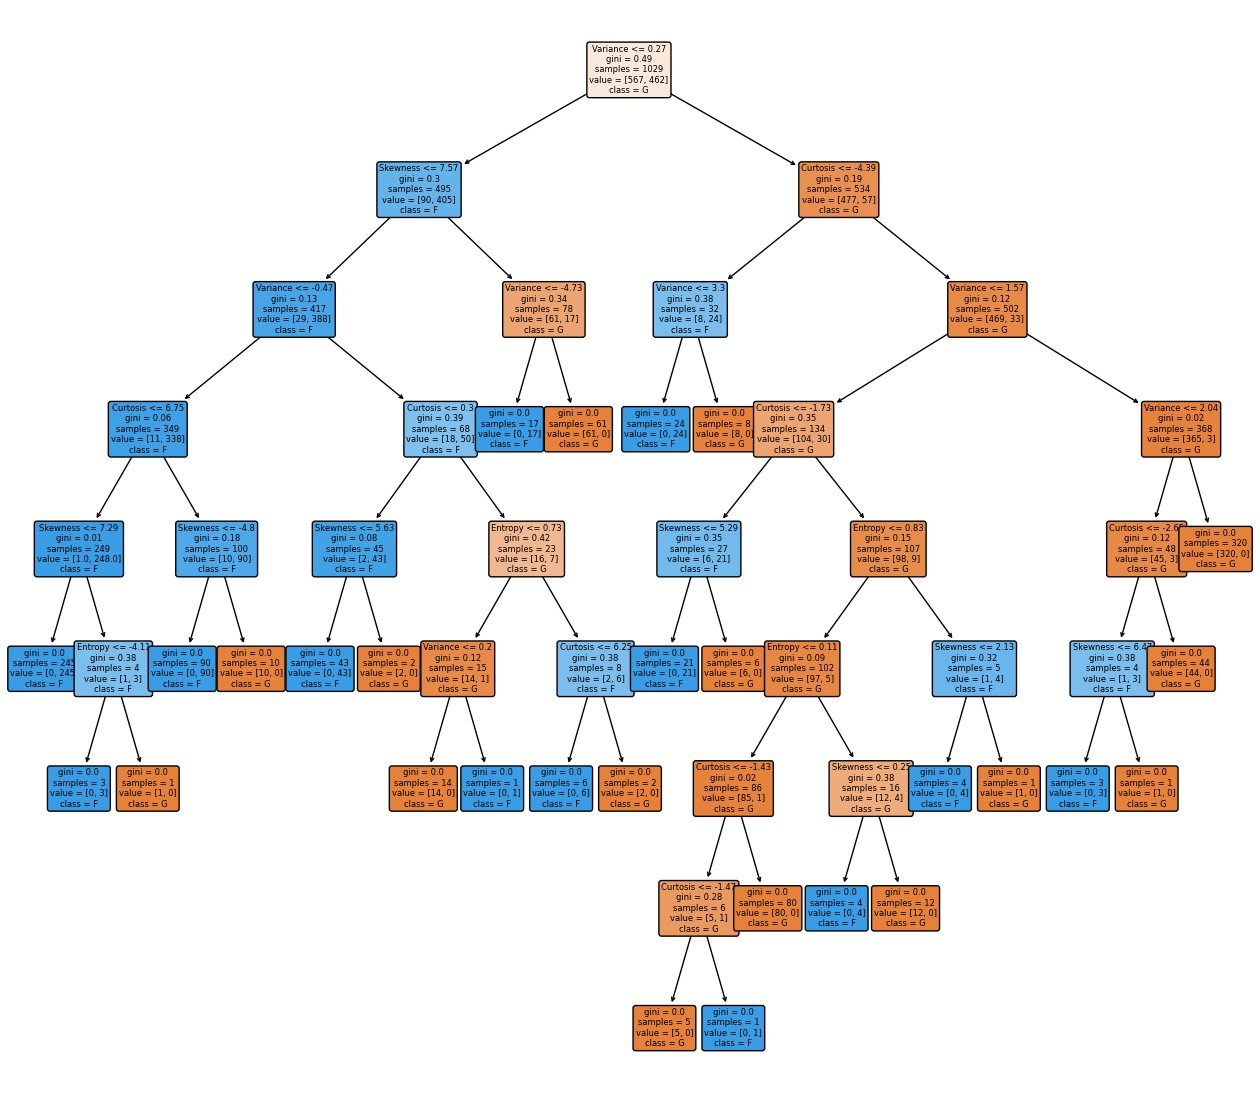

In [58]:
plt.figure(figsize=(16,14))
plot_tree(decision_tree=dt, fontsize=6, feature_names=x.columns, class_names=['G', 'F'], 
          filled= True, rounded=True, precision= 2)

In [62]:
new = pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                    [3.4566, 9.5228, -4.0112, -3.5944],
                    [4.5459, 8.1674, -2.4586, -1.4621]], columns=x.columns)

In [63]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [64]:
n_pred = dt.predict(new)
n_pred

array([1, 0, 0], dtype=int64)

Random Forest with 10 trees

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators= 10, random_state=0)

In [68]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [69]:
y_pred = rf.predict(X_test)

In [70]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [71]:
accuracy_score(y_test, y_pred)

0.9941690962099126

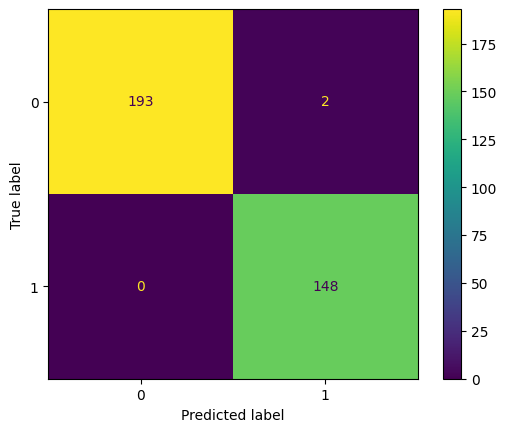

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

